### Libraries and functions

In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from BorutaShap import BorutaShap
from powershap  import PowerShap
import shapicant
from tqdm import tqdm
from SHAPEffects import FeatureSelector
import random
import shap
import os
os.environ['PYTHONHASHSEED'] = str(1234)
random.seed(1234)
np.random.seed(1234)
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'serif'

C:\Users\csebastian\.conda\envs\BrainEN_v1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Taken from PowerSHAP paper
def scores_calc_print(Y,Y_pred,print_bool):
    if len(Y_pred) > 1:
        R2_total = r2_score(Y,Y_pred)
    else:
        R2_total = -1
    RMSE_total = mean_squared_error(Y,Y_pred, squared=False)
    MAE_total = mean_absolute_error(Y,Y_pred)
    
    if print_bool:
        print(tabulate([[RMSE_total, MAE_total,R2_total]], ["RMSE","MAE","R²"], tablefmt="grid"))
    else:
        return {"R2":R2_total,"RMSE":RMSE_total,"MAE":MAE_total}

### Data

In [3]:
current_db = pd.read_csv(r"Data/slice_localization_data.csv")
# current_db = current_db.reset_index()

Index_col = "patientId"
target_col = "reference"

In [4]:
train_idx,test_idx = train_test_split(current_db[Index_col].unique(),test_size=0.25,random_state = 1)
current_db_train = current_db[current_db[Index_col].isin(train_idx)]
train_idx, val_idx = train_test_split(current_db_train[Index_col].unique(),test_size=0.37,random_state = 1)
current_db_val = current_db_train[current_db_train[Index_col].isin(val_idx)]
current_db_train = current_db[current_db[Index_col].isin(train_idx)]
current_db_test = current_db[current_db[Index_col].isin(test_idx)]

In [5]:
len(current_db_train), len(current_db_val), len(current_db_test), len(current_db), len(current_db_train) + len(current_db_val) + len(current_db_test)

(29372, 11975, 12153, 53500, 53500)

In [6]:
X_train = current_db_train[list(current_db_train.columns.values[2:-1])]
y_train = current_db_train[target_col]

X_val = current_db_val[list(current_db_val.columns.values[2:-1])]
y_val = current_db_val[target_col]

X_test = current_db_test[list(current_db_test.columns.values[2:-1])]
y_test = current_db_test[target_col]

In [7]:
selected_columns = list(current_db_train.columns.values[2:-1])

In [8]:
X_train_val = X_train.append(X_val)
y_train_val = y_train.append(y_val)

In [9]:
current_db_train_val = current_db_train.append(current_db_val)

In [10]:
seeds = np.random.randint(1, 999999, 50)

## SHAPEffects 0.75-0.25

In [11]:
model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=False, random_seed = 123)
feat_sel = FeatureSelector()
selected_features_shapeffects_075_025 = feat_sel.fit(X_train, y_train, X_val, y_val, model, 30, 0.25, 0.75)
selected_features_shapeffects_075_025 = sorted(list(selected_features_shapeffects_075_025))

Preprocessing
-------------

Introducing a random variable
Calculating Shapley values
Removing the first features
24 features have been removed
['value28', 'value49', 'value58', 'value59', 'value68', 'value69', 'value79', 'value169', 'value178', 'value179', 'value188', 'value189', 'value199', 'value254', 'value271', 'value278', 'value279', 'value287', 'value302', 'value303', 'value343', 'value350', 'value351', 'value359', 'RandomVariable']

Starting core module
--------------------

Iteration 1
	Clasifying residuals
	Giving weights to features
	Selecting features
	75 features have been removed
	 ['value9', 'value27', 'value29', 'value34', 'value36', 'value37', 'value38', 'value45', 'value48', 'value56', 'value57', 'value65', 'value66', 'value67', 'value77', 'value78', 'value87', 'value88', 'value89', 'value92', 'value97', 'value99', 'value107', 'value128', 'value129', 'value137', 'value156', 'value157', 'value159', 'value165', 'value167', 'value168', 'value175', 'value177', 'value184',


Iteration 41
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value63']
	160 features left

Iteration 42
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value231']
	159 features left

Iteration 43
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value113']
	158 features left

Iteration 44
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value306']
	157 features left

Iteration 45
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value243']
	156 features left

Iteration 46
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value238']
	155 features left

Iteration 47
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed


Iteration 97
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value125']
	104 features left

Iteration 98
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value3']
	103 features left

Iteration 99
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value191']
	102 features left

Iteration 100
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value105']
	101 features left

Iteration 101
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value161']
	100 features left

Iteration 102
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value234']
	99 features left

Iteration 103
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been remov

In [12]:
feat_sel.best_mae

3.104519007344535

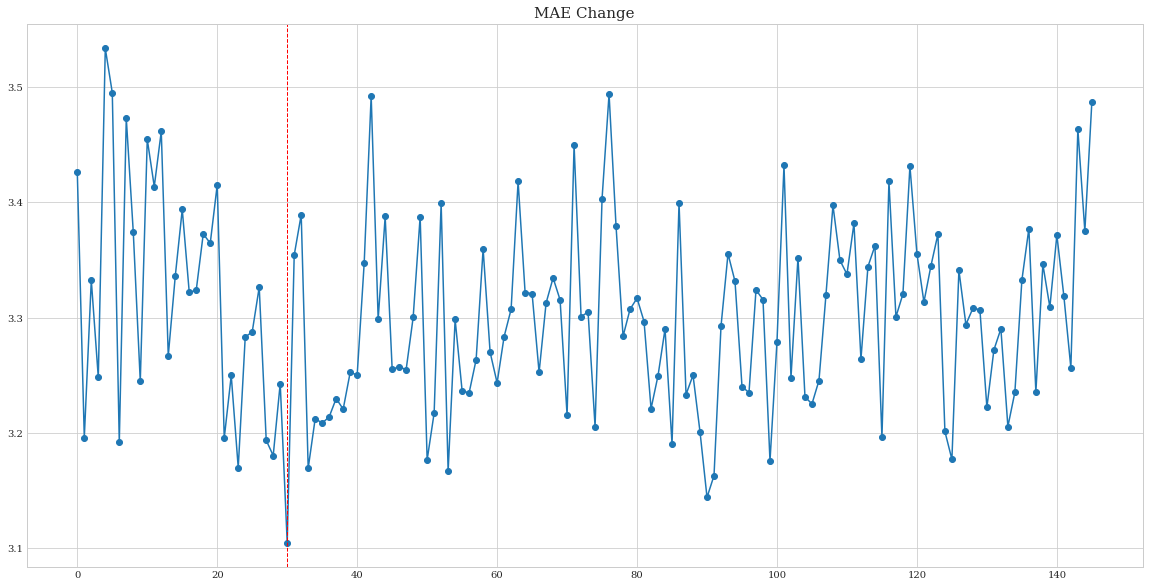

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(range(len(feat_sel.maes)), feat_sel.maes.keys(), '-o')
ax.title.set_text("MAE Change")
ax.title.set_size(15)
plt.axvline(np.argmin(list(feat_sel.maes.keys())), color='red', linestyle='dashed', linewidth=1)

In [14]:
selected_features_shapeffects_075_025

['value1',
 'value10',
 'value100',
 'value102',
 'value103',
 'value104',
 'value105',
 'value108',
 'value11',
 'value110',
 'value112',
 'value113',
 'value115',
 'value117',
 'value118',
 'value12',
 'value120',
 'value121',
 'value122',
 'value123',
 'value125',
 'value126',
 'value127',
 'value13',
 'value130',
 'value131',
 'value132',
 'value133',
 'value134',
 'value135',
 'value136',
 'value138',
 'value14',
 'value140',
 'value141',
 'value142',
 'value145',
 'value146',
 'value150',
 'value151',
 'value152',
 'value154',
 'value158',
 'value16',
 'value160',
 'value161',
 'value162',
 'value171',
 'value172',
 'value173',
 'value176',
 'value18',
 'value180',
 'value181',
 'value182',
 'value183',
 'value190',
 'value191',
 'value192',
 'value2',
 'value200',
 'value201',
 'value202',
 'value203',
 'value207',
 'value210',
 'value211',
 'value212',
 'value213',
 'value214',
 'value215',
 'value218',
 'value219',
 'value22',
 'value220',
 'value221',
 'value222',
 'value223'

In [15]:
dict_results_shapeffects_075_025 = {'rmse':[], 'mae':[], 'r2':[]}

In [16]:
X_test_shapeffects = X_test[selected_features_shapeffects_075_025]
X_train_shapeffects= X_train[selected_features_shapeffects_075_025]
X_val_shapeffects = X_val[selected_features_shapeffects_075_025]
for iteration in range(50):
    print(iteration)
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=True, random_seed=seeds[iteration])
    model.fit(
        X_train_shapeffects, y_train,
        eval_set=(X_val_shapeffects, y_val),
        verbose = 0,
        plot=False
    );
    
    test_results = scores_calc_print(y_test, model.predict(X_test_shapeffects), print_bool=False)
    
    dict_results_shapeffects_075_025["r2"].append(test_results["R2"])
    dict_results_shapeffects_075_025["rmse"].append(test_results["RMSE"])
    dict_results_shapeffects_075_025["mae"].append(test_results["MAE"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [17]:
results_shapeffects_075_025_df = pd.DataFrame(dict_results_shapeffects_075_025)
mean_shapeffects_075_025_test = results_shapeffects_075_025_df.mean()
std_shapeffects_075_025_test = results_shapeffects_075_025_df.std()
max_shapeffects_075_025_test = results_shapeffects_075_025_df.max()
min_shapeffects_075_025_test = results_shapeffects_075_025_df.min()

In [18]:
mean_shapeffects_075_025_test, std_shapeffects_075_025_test, max_shapeffects_075_025_test, min_shapeffects_075_025_test

(rmse    7.095283
 mae     4.417912
 r2      0.888156
 dtype: float64,
 rmse    0.160347
 mae     0.088234
 r2      0.005023
 dtype: float64,
 rmse    7.440520
 mae     4.631994
 r2      0.903191
 dtype: float64,
 rmse    6.602837
 mae     4.203151
 r2      0.877069
 dtype: float64)

## SHAPEffects 0.8-0.2

In [19]:
model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=False, random_seed = 123)
feat_sel = FeatureSelector()
selected_features_shapeffects_08_02 = feat_sel.fit(X_train, y_train, X_val, y_val, model, 30, 0.2, 0.8)
selected_features_shapeffects_08_02 = sorted(list(selected_features_shapeffects_08_02))

Preprocessing
-------------

Introducing a random variable
Calculating Shapley values
Removing the first features
24 features have been removed
['value49', 'value58', 'value59', 'value68', 'value69', 'value79', 'value169', 'value178', 'value179', 'value188', 'value189', 'value199', 'value254', 'value271', 'value278', 'value279', 'value287', 'value302', 'value303', 'value327', 'value343', 'value350', 'value351', 'value359', 'RandomVariable']

Starting core module
--------------------

Iteration 1
	Clasifying residuals
	Giving weights to features
	Selecting features
	74 features have been removed
	 ['value11', 'value27', 'value38', 'value48', 'value55', 'value56', 'value57', 'value65', 'value66', 'value67', 'value77', 'value78', 'value80', 'value82', 'value86', 'value87', 'value88', 'value89', 'value93', 'value97', 'value99', 'value128', 'value139', 'value156', 'value159', 'value165', 'value166', 'value167', 'value168', 'value175', 'value177', 'value187', 'value196', 'value198', 'value20

	Selecting features
	1 features have been removed
	 ['value76']
	158 features left

Iteration 41
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value22']
	157 features left

Iteration 42
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value170']
	156 features left

Iteration 43
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value114']
	155 features left

Iteration 44
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value163']
	154 features left

Iteration 45
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value274']
	153 features left

Iteration 46
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value118']
	152 features left

Iteration 47
	Clasifying resi


Iteration 96
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value120']
	101 features left

Iteration 97
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value242']
	100 features left

Iteration 98
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value116']
	99 features left

Iteration 99
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value172']
	98 features left

Iteration 100
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value134']
	97 features left

Iteration 101
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value182']
	96 features left

Iteration 102
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed

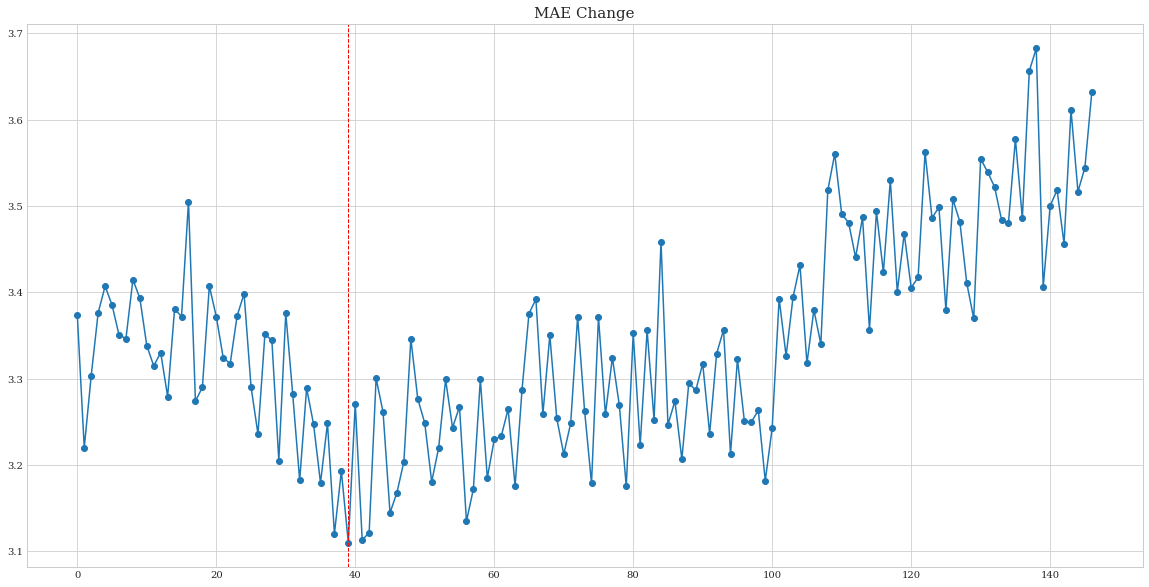

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(range(len(feat_sel.maes)), feat_sel.maes.keys(), '-o')
ax.title.set_text("MAE Change")
ax.title.set_size(15)
plt.axvline(np.argmin(list(feat_sel.maes.keys())), color='red', linestyle='dashed', linewidth=1)

In [21]:
selected_features_shapeffects_08_02

['value10',
 'value100',
 'value102',
 'value103',
 'value104',
 'value105',
 'value108',
 'value110',
 'value113',
 'value114',
 'value115',
 'value116',
 'value117',
 'value118',
 'value12',
 'value120',
 'value122',
 'value123',
 'value125',
 'value126',
 'value127',
 'value13',
 'value130',
 'value131',
 'value132',
 'value133',
 'value134',
 'value135',
 'value136',
 'value138',
 'value14',
 'value140',
 'value142',
 'value145',
 'value148',
 'value150',
 'value151',
 'value152',
 'value158',
 'value16',
 'value161',
 'value163',
 'value17',
 'value170',
 'value171',
 'value172',
 'value173',
 'value176',
 'value18',
 'value181',
 'value182',
 'value185',
 'value190',
 'value191',
 'value192',
 'value2',
 'value201',
 'value202',
 'value207',
 'value21',
 'value210',
 'value212',
 'value213',
 'value214',
 'value215',
 'value218',
 'value22',
 'value220',
 'value221',
 'value222',
 'value223',
 'value224',
 'value225',
 'value226',
 'value228',
 'value23',
 'value230',
 'value231'

In [22]:
dict_results_shapeffects_08_02 = {'rmse':[], 'mae':[], 'r2':[]}

In [23]:
X_test_shapeffects = X_test[selected_features_shapeffects_08_02]
X_train_shapeffects= X_train[selected_features_shapeffects_08_02]
X_val_shapeffects = X_val[selected_features_shapeffects_08_02]
for iteration in range(50):
    print(iteration)
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=True, random_seed=seeds[iteration])
    model.fit(
        X_train_shapeffects, y_train,
        eval_set=(X_val_shapeffects, y_val),
        verbose = 0,
        plot=False
    );
    
    test_results = scores_calc_print(y_test, model.predict(X_test_shapeffects), print_bool=False)
    
    dict_results_shapeffects_08_02["r2"].append(test_results["R2"])
    dict_results_shapeffects_08_02["rmse"].append(test_results["RMSE"])
    dict_results_shapeffects_08_02["mae"].append(test_results["MAE"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [24]:
results_shapeffects_08_02_df = pd.DataFrame(dict_results_shapeffects_08_02)
mean_shapeffects_08_02_test = results_shapeffects_08_02_df.mean()
std_shapeffects_08_02_test = results_shapeffects_08_02_df.std()
max_shapeffects_08_02_test = results_shapeffects_08_02_df.max()
min_shapeffects_08_02_test = results_shapeffects_08_02_df.min()

In [25]:
mean_shapeffects_08_02_test, std_shapeffects_08_02_test, max_shapeffects_08_02_test, min_shapeffects_08_02_test

(rmse    7.316082
 mae     4.449512
 r2      0.881099
 dtype: float64,
 rmse    0.148377
 mae     0.081179
 r2      0.004807
 dtype: float64,
 rmse    7.606147
 mae     4.620984
 r2      0.892424
 dtype: float64,
 rmse    6.960348
 mae     4.262113
 r2      0.871535
 dtype: float64)

## SHAPEffects 0.85-0.15

In [26]:
model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=False, random_seed = 123)
feat_sel = FeatureSelector()
selected_features_shapeffects_085_015 = feat_sel.fit(X_train, y_train, X_val, y_val, model, 30, 0.15, 0.85)
selected_features_shapeffects_085_015 = sorted(list(selected_features_shapeffects_085_015))

Preprocessing
-------------

Introducing a random variable
Calculating Shapley values
Removing the first features
23 features have been removed
['value49', 'value58', 'value59', 'value68', 'value69', 'value79', 'value169', 'value178', 'value179', 'value188', 'value189', 'value199', 'value254', 'value271', 'value278', 'value279', 'value287', 'value302', 'value343', 'value350', 'value351', 'value359', 'value374', 'RandomVariable']

Starting core module
--------------------

Iteration 1
	Clasifying residuals
	Giving weights to features
	Selecting features
	67 features have been removed
	 ['value31', 'value37', 'value45', 'value46', 'value48', 'value55', 'value57', 'value66', 'value67', 'value78', 'value87', 'value88', 'value94', 'value97', 'value99', 'value155', 'value159', 'value164', 'value165', 'value166', 'value168', 'value177', 'value186', 'value187', 'value194', 'value197', 'value198', 'value205', 'value206', 'value208', 'value216', 'value238', 'value239', 'value247', 'value255', 'v

	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value170']
	165 features left

Iteration 42
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value173']
	164 features left

Iteration 43
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value163']
	163 features left

Iteration 44
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value113']
	162 features left

Iteration 45
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value91']
	161 features left

Iteration 46
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value211']
	160 features left

Iteration 47
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value132'


Iteration 97
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value228']
	108 features left

Iteration 98
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value362']
	107 features left

Iteration 99
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value225']
	106 features left

Iteration 100
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value90']
	105 features left

Iteration 101
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value172']
	104 features left

Iteration 102
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value365']
	103 features left

Iteration 103
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been rem

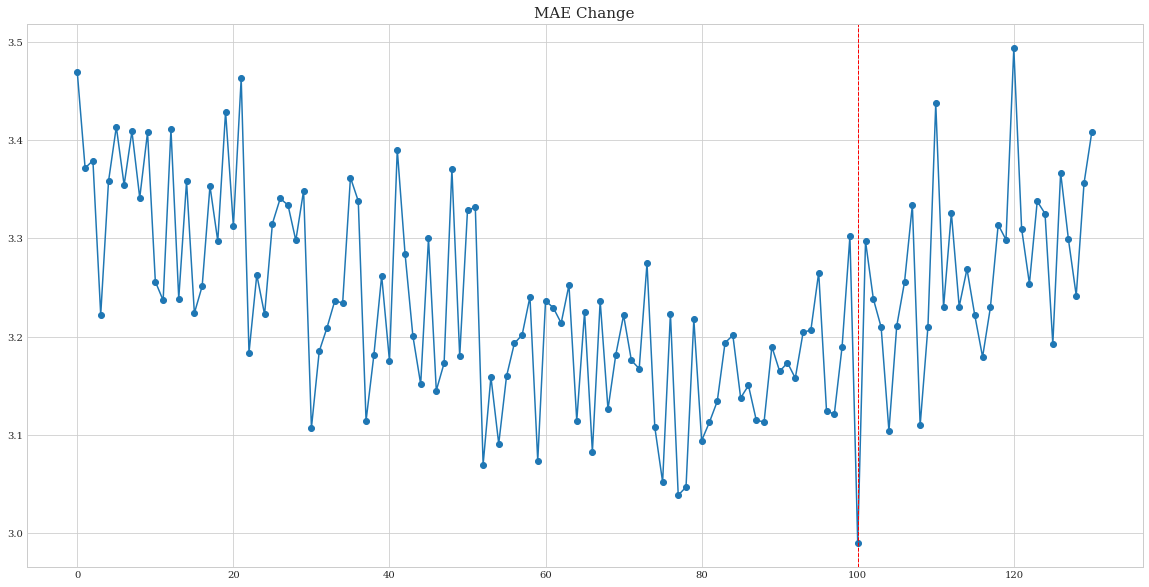

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(range(len(feat_sel.maes)), feat_sel.maes.keys(), '-o')
ax.title.set_text("MAE Change")
ax.title.set_size(15)
plt.axvline(np.argmin(list(feat_sel.maes.keys())), color='red', linestyle='dashed', linewidth=1)

In [28]:
selected_features_shapeffects_085_015

['value10',
 'value100',
 'value103',
 'value104',
 'value105',
 'value108',
 'value11',
 'value110',
 'value111',
 'value112',
 'value115',
 'value120',
 'value121',
 'value127',
 'value130',
 'value131',
 'value133',
 'value135',
 'value136',
 'value138',
 'value14',
 'value140',
 'value142',
 'value145',
 'value154',
 'value158',
 'value172',
 'value176',
 'value18',
 'value182',
 'value192',
 'value2',
 'value201',
 'value203',
 'value207',
 'value21',
 'value212',
 'value213',
 'value214',
 'value215',
 'value219',
 'value222',
 'value226',
 'value23',
 'value232',
 'value234',
 'value235',
 'value236',
 'value237',
 'value241',
 'value248',
 'value249',
 'value25',
 'value252',
 'value256',
 'value258',
 'value259',
 'value26',
 'value264',
 'value265',
 'value266',
 'value273',
 'value274',
 'value275',
 'value276',
 'value280',
 'value281',
 'value282',
 'value283',
 'value291',
 'value292',
 'value298',
 'value299',
 'value30',
 'value300',
 'value305',
 'value307',
 'value308

In [29]:
dict_results_shapeffects_085_015 = {'rmse':[], 'mae':[], 'r2':[]}

In [30]:
X_test_shapeffects = X_test[selected_features_shapeffects_085_015]
X_train_shapeffects= X_train[selected_features_shapeffects_085_015]
X_val_shapeffects = X_val[selected_features_shapeffects_085_015]
for iteration in range(50):
    print(iteration)
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=True, random_seed=seeds[iteration])
    model.fit(
        X_train_shapeffects, y_train,
        eval_set=(X_val_shapeffects, y_val),
        verbose = 0,
        plot=False
    );
    
    test_results = scores_calc_print(y_test, model.predict(X_test_shapeffects), print_bool=False)
    
    dict_results_shapeffects_085_015["r2"].append(test_results["R2"])
    dict_results_shapeffects_085_015["rmse"].append(test_results["RMSE"])
    dict_results_shapeffects_085_015["mae"].append(test_results["MAE"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [31]:
results_shapeffects_085_015_df = pd.DataFrame(dict_results_shapeffects_085_015)
mean_shapeffects_085_015_test = results_shapeffects_085_015_df.mean()
std_shapeffects_085_015_test = results_shapeffects_085_015_df.std()
max_shapeffects_085_015_test = results_shapeffects_085_015_df.max()
min_shapeffects_085_015_test = results_shapeffects_085_015_df.min()

In [32]:
mean_shapeffects_085_015_test, std_shapeffects_085_015_test, max_shapeffects_085_015_test, min_shapeffects_085_015_test

(rmse    7.866138
 mae     4.780158
 r2      0.862534
 dtype: float64,
 rmse    0.177320
 mae     0.083352
 r2      0.006243
 dtype: float64,
 rmse    8.382526
 mae     5.021066
 r2      0.875170
 dtype: float64,
 rmse    7.497778
 mae     4.634907
 r2      0.843971
 dtype: float64)

## SHAPEffects 0.9-0.1

In [33]:
model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=False, random_seed = 123)
feat_sel = FeatureSelector()
selected_features_shapeffects_09_01 = feat_sel.fit(X_train, y_train, X_val, y_val, model, 30, 0.1, 0.9)
selected_features_shapeffects_09_01 = sorted(list(selected_features_shapeffects_09_01))

Preprocessing
-------------

Introducing a random variable
Calculating Shapley values
Removing the first features
23 features have been removed
['value49', 'value58', 'value59', 'value68', 'value69', 'value79', 'value169', 'value178', 'value179', 'value188', 'value189', 'value199', 'value254', 'value271', 'value279', 'value287', 'value302', 'value327', 'value343', 'value350', 'value351', 'value359', 'value375', 'RandomVariable']

Starting core module
--------------------

Iteration 1
	Clasifying residuals
	Giving weights to features
	Selecting features
	64 features have been removed
	 ['value22', 'value27', 'value28', 'value36', 'value37', 'value38', 'value48', 'value56', 'value57', 'value66', 'value67', 'value76', 'value78', 'value87', 'value88', 'value97', 'value99', 'value139', 'value153', 'value156', 'value159', 'value165', 'value166', 'value167', 'value168', 'value177', 'value194', 'value196', 'value198', 'value204', 'value205', 'value206', 'value208', 'value209', 'value219', 'val

	Selecting features
	1 features have been removed
	 ['value3']
	166 features left

Iteration 42
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value74']
	165 features left

Iteration 43
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value151']
	164 features left

Iteration 44
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value180']
	163 features left

Iteration 45
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value141']
	162 features left

Iteration 46
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value220']
	161 features left

Iteration 47
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value221']
	160 features left

Iteration 48
	Clasifying resid


Iteration 96
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value6']
	111 features left

Iteration 97
	Clasifying residuals
	Giving weights to features
	Selecting features
	0 features have been removed
	111 features left
111 features have been selected out of 384


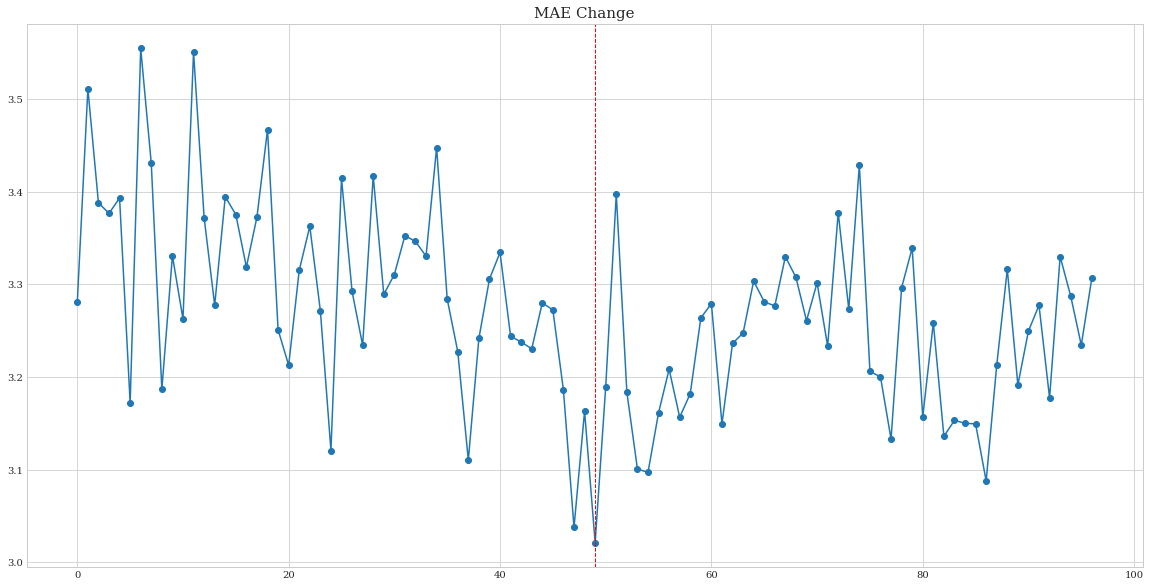

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(range(len(feat_sel.maes)), feat_sel.maes.keys(), '-o')
ax.title.set_text("MAE Change")
ax.title.set_size(15)
plt.axvline(np.argmin(list(feat_sel.maes.keys())), color='red', linestyle='dashed', linewidth=1)

In [35]:
selected_features_shapeffects_09_01

['value10',
 'value100',
 'value102',
 'value103',
 'value104',
 'value105',
 'value108',
 'value110',
 'value112',
 'value113',
 'value114',
 'value115',
 'value116',
 'value117',
 'value118',
 'value119',
 'value12',
 'value120',
 'value121',
 'value122',
 'value125',
 'value126',
 'value127',
 'value130',
 'value131',
 'value132',
 'value133',
 'value134',
 'value135',
 'value136',
 'value138',
 'value14',
 'value140',
 'value142',
 'value145',
 'value148',
 'value15',
 'value150',
 'value152',
 'value158',
 'value16',
 'value161',
 'value164',
 'value17',
 'value171',
 'value172',
 'value173',
 'value174',
 'value18',
 'value181',
 'value182',
 'value183',
 'value186',
 'value191',
 'value192',
 'value2',
 'value200',
 'value201',
 'value203',
 'value207',
 'value21',
 'value210',
 'value211',
 'value212',
 'value213',
 'value214',
 'value215',
 'value218',
 'value222',
 'value223',
 'value224',
 'value225',
 'value226',
 'value227',
 'value228',
 'value23',
 'value230',
 'value232

In [36]:
dict_results_shapeffects_09_01 = {'rmse':[], 'mae':[], 'r2':[]}

In [37]:
X_test_shapeffects = X_test[selected_features_shapeffects_09_01]
X_train_shapeffects= X_train[selected_features_shapeffects_09_01]
X_val_shapeffects = X_val[selected_features_shapeffects_09_01]
for iteration in range(50):
    print(iteration)
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=True, random_seed=seeds[iteration])
    model.fit(
        X_train_shapeffects, y_train,
        eval_set=(X_val_shapeffects, y_val),
        verbose = 0,
        plot=False
    );
    
    test_results = scores_calc_print(y_test, model.predict(X_test_shapeffects), print_bool=False)
    
    dict_results_shapeffects_09_01["r2"].append(test_results["R2"])
    dict_results_shapeffects_09_01["rmse"].append(test_results["RMSE"])
    dict_results_shapeffects_09_01["mae"].append(test_results["MAE"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [38]:
results_shapeffects_09_01_df = pd.DataFrame(dict_results_shapeffects_09_01)
mean_shapeffects_09_01_test = results_shapeffects_09_01_df.mean()
std_shapeffects_09_01_test = results_shapeffects_09_01_df.std()
max_shapeffects_09_01_test = results_shapeffects_09_01_df.max()
min_shapeffects_09_01_test = results_shapeffects_09_01_df.min()

In [39]:
mean_shapeffects_09_01_test, std_shapeffects_09_01_test, max_shapeffects_09_01_test, min_shapeffects_09_01_test

(rmse    7.233199
 mae     4.450812
 r2      0.883752
 dtype: float64,
 rmse    0.182576
 mae     0.109879
 r2      0.005865
 dtype: float64,
 rmse    7.782839
 mae     4.718291
 r2      0.901451
 dtype: float64,
 rmse    6.661913
 mae     4.202350
 r2      0.865497
 dtype: float64)

## SHAPEffects 0.95-0.05

In [40]:
model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=False, random_seed = 123)
feat_sel = FeatureSelector()
selected_features_shapeffects_095_005 = feat_sel.fit(X_train, y_train, X_val, y_val, model, 30, 0.05, 0.95)
selected_features_shapeffects_095_005 = sorted(list(selected_features_shapeffects_095_005))

Preprocessing
-------------

Introducing a random variable
Calculating Shapley values
Removing the first features
22 features have been removed
['value49', 'value58', 'value59', 'value68', 'value69', 'value79', 'value169', 'value178', 'value179', 'value188', 'value189', 'value199', 'value254', 'value271', 'value279', 'value287', 'value302', 'value327', 'value343', 'value350', 'value351', 'value359', 'RandomVariable']

Starting core module
--------------------

Iteration 1
	Clasifying residuals
	Giving weights to features
	Selecting features
	66 features have been removed
	 ['value9', 'value20', 'value27', 'value28', 'value36', 'value37', 'value38', 'value48', 'value57', 'value66', 'value67', 'value72', 'value78', 'value84', 'value87', 'value88', 'value91', 'value97', 'value99', 'value129', 'value137', 'value155', 'value165', 'value166', 'value167', 'value168', 'value174', 'value175', 'value177', 'value187', 'value196', 'value198', 'value205', 'value206', 'value208', 'value229', 'value2


Iteration 41
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value54']
	161 features left

Iteration 42
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value64']
	160 features left

Iteration 43
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value190']
	159 features left

Iteration 44
	Clasifying residuals
	Giving weights to features
	Selecting features
	2 features have been removed
	 ['value34', 'value323']
	157 features left

Iteration 45
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value268']
	156 features left

Iteration 46
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have been removed
	 ['value130']
	155 features left

Iteration 47
	Clasifying residuals
	Giving weights to features
	Selecting features
	1 features have be

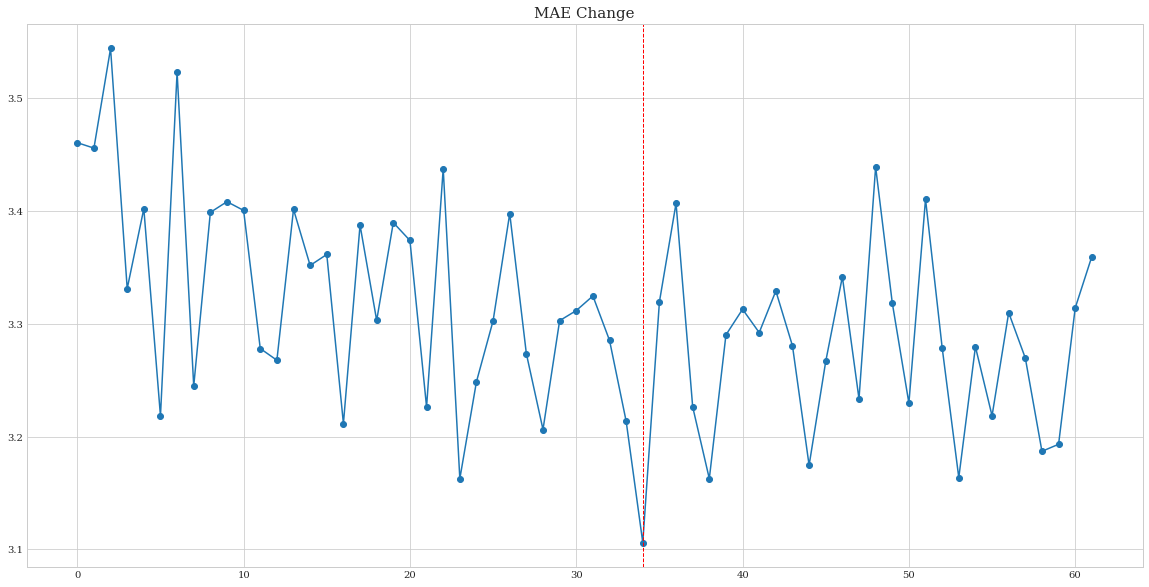

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(range(len(feat_sel.maes)), feat_sel.maes.keys(), '-o')
ax.title.set_text("MAE Change")
ax.title.set_size(15)
plt.axvline(np.argmin(list(feat_sel.maes.keys())), color='red', linestyle='dashed', linewidth=1)

In [42]:
selected_features_shapeffects_095_005

['value1',
 'value10',
 'value100',
 'value101',
 'value103',
 'value104',
 'value105',
 'value106',
 'value108',
 'value110',
 'value112',
 'value113',
 'value114',
 'value115',
 'value116',
 'value117',
 'value118',
 'value119',
 'value120',
 'value122',
 'value123',
 'value124',
 'value126',
 'value127',
 'value13',
 'value130',
 'value131',
 'value132',
 'value133',
 'value134',
 'value135',
 'value136',
 'value138',
 'value139',
 'value14',
 'value140',
 'value141',
 'value145',
 'value148',
 'value150',
 'value151',
 'value152',
 'value154',
 'value158',
 'value160',
 'value161',
 'value170',
 'value171',
 'value172',
 'value176',
 'value18',
 'value180',
 'value181',
 'value182',
 'value183',
 'value184',
 'value185',
 'value190',
 'value191',
 'value192',
 'value2',
 'value200',
 'value201',
 'value202',
 'value203',
 'value207',
 'value209',
 'value21',
 'value210',
 'value212',
 'value213',
 'value214',
 'value215',
 'value218',
 'value22',
 'value220',
 'value221',
 'value22

In [45]:
dict_results_shapeffects_095_005 = {'rmse':[], 'mae':[], 'r2':[]}

In [46]:
X_test_shapeffects = X_test[selected_features_shapeffects_095_005]
X_train_shapeffects= X_train[selected_features_shapeffects_095_005]
X_val_shapeffects = X_val[selected_features_shapeffects_095_005]
for iteration in range(50):
    print(iteration)
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=True, random_seed=seeds[iteration])
    model.fit(
        X_train_shapeffects, y_train,
        eval_set=(X_val_shapeffects, y_val),
        verbose = 0,
        plot=False
    );
    
    test_results = scores_calc_print(y_test, model.predict(X_test_shapeffects), print_bool=False)
    
    dict_results_shapeffects_095_005["r2"].append(test_results["R2"])
    dict_results_shapeffects_095_005["rmse"].append(test_results["RMSE"])
    dict_results_shapeffects_095_005["mae"].append(test_results["MAE"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [47]:
results_shapeffects_095_005_df = pd.DataFrame(dict_results_shapeffects_095_005)
mean_shapeffects_095_005_test = results_shapeffects_095_005_df.mean()
std_shapeffects_095_005_test = results_shapeffects_095_005_df.std()
max_shapeffects_095_005_test = results_shapeffects_095_005_df.max()
min_shapeffects_095_005_test = results_shapeffects_095_005_df.min()

In [48]:
mean_shapeffects_095_005_test, std_shapeffects_095_005_test, max_shapeffects_095_005_test, min_shapeffects_095_005_test

(rmse    7.150440
 mae     4.359387
 r2      0.886410
 dtype: float64,
 rmse    0.163054
 mae     0.083367
 r2      0.005178
 dtype: float64,
 rmse    7.594933
 mae     4.612214
 r2      0.898385
 dtype: float64,
 rmse    6.764755
 mae     4.212468
 r2      0.871914
 dtype: float64)

## PowerSHAP

In [50]:
selector = PowerShap(
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=False, random_seed = 123),
    power_iterations=10,automatic=True, limit_automatic=10,verbose=True,target_col=target_col,index_col=Index_col,
)
selector.fit(current_db_train_val[list(selected_columns)], current_db_train_val[target_col])

Starting powershap
Automatic mode enabled: Finding the minimal required powershap iterations for significance of 0.01.



Automatic mode: powershap requires 52  iterations; The extra required iterations exceed the limit_automatic  threshold. Powershap will add  10 powershap iterations and  re-evaluate.



Automatic mode: powershap requires 39  iterations; The extra required iterations exceed the limit_automatic  threshold. Powershap will add  10 powershap iterations and  re-evaluate.



Automatic mode: powershap requires 54  iterations; The extra required iterations exceed the limit_automatic  threshold. Powershap will add  10 powershap iterations and  re-evaluate.



Done!


PowerShap(model=<catboost.core.CatBoostRegressor object at 0x0000023F22A44490>,
          verbose=True)

In [51]:
t = selector._processed_shaps_df
selected_features_powershap = t[(t.p_value<0.01)].index.values
selected_features_powershap

array(['value273', 'value378', 'value18', 'value4', 'value138',
       'value114', 'value135', 'value228', 'value226', 'value108',
       'value314', 'value370', 'value237', 'value3', 'value170',
       'value215', 'value115', 'value145', 'value183', 'value172',
       'value222', 'value136', 'value182', 'value173', 'value118',
       'value377', 'value225', 'value300', 'value53', 'value264',
       'value242', 'value160', 'value116', 'value227', 'value110',
       'value120', 'value331', 'value200', 'value291', 'value132',
       'value233', 'value150', 'value140', 'value192', 'value213',
       'value127', 'value8', 'value274', 'value106', 'value272',
       'value281', 'value63', 'value64', 'value210', 'value251',
       'value134', 'value117', 'value212', 'value236', 'value126',
       'value113', 'value171', 'value14', 'value5', 'value292',
       'value230', 'value190', 'value214', 'value299', 'value232',
       'value123', 'value235', 'value191', 'value307', 'value35',
       'v

In [11]:
selected_features_powershap = sorted(['value273', 'value378', 'value18', 'value4', 'value138',
       'value114', 'value135', 'value228', 'value226', 'value108',
       'value314', 'value370', 'value237', 'value3', 'value170',
       'value215', 'value115', 'value145', 'value183', 'value172',
       'value222', 'value136', 'value182', 'value173', 'value118',
       'value377', 'value225', 'value300', 'value53', 'value264',
       'value242', 'value160', 'value116', 'value227', 'value110',
       'value120', 'value331', 'value200', 'value291', 'value132',
       'value233', 'value150', 'value140', 'value192', 'value213',
       'value127', 'value8', 'value274', 'value106', 'value272',
       'value281', 'value63', 'value64', 'value210', 'value251',
       'value134', 'value117', 'value212', 'value236', 'value126',
       'value113', 'value171', 'value14', 'value5', 'value292',
       'value230', 'value190', 'value214', 'value299', 'value232',
       'value123', 'value235', 'value191', 'value307', 'value35',
       'value131', 'value339', 'value141', 'value125', 'value258',
       'value180', 'value265', 'value223', 'value308', 'value282',
       'value124', 'value181', 'value122', 'value112', 'value158',
       'value234', 'value83', 'value146', 'value201', 'value252',
       'value81', 'value151', 'value40', 'value161', 'value266',
       'value16', 'value220', 'value2', 'value13', 'value52', 'value216',
       'value54', 'value100', 'value130', 'value33', 'value61',
       'value221', 'value256', 'value60', 'value142', 'value104',
       'value248', 'value6', 'value231', 'value102', 'value94', 'value10',
       'value250', 'value103', 'value105', 'value47', 'value267',
       'value276', 'value70', 'value26', 'value211', 'value275',
       'value224', 'value101', 'value121', 'value23', 'value219',
       'value380', 'value42', 'value218', 'value22', 'value50',
       'value111', 'value43', 'value355', 'value356', 'value17'])

In [12]:
dict_results_powershap = {'rmse':[], 'mae':[], 'r2':[]}

In [13]:
X_test_powershap = X_test[selected_features_powershap]
X_train_powershap = X_train[selected_features_powershap]
X_val_powershap = X_val[selected_features_powershap]
for iteration in range(50):
    print(iteration)
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=True, random_seed=seeds[iteration])
    model.fit(
        X_train_powershap, y_train,
        eval_set=(X_val_powershap, y_val),
        verbose = 0,
        plot=False
    );
    
    test_results = scores_calc_print(y_test, model.predict(X_test_powershap), print_bool=False)
    
    dict_results_powershap["r2"].append(test_results["R2"])
    dict_results_powershap["rmse"].append(test_results["RMSE"])
    dict_results_powershap["mae"].append(test_results["MAE"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [14]:
results_powershap_df = pd.DataFrame(dict_results_powershap)
mean_powershap_test = results_powershap_df.mean()
std_powershap_test = results_powershap_df.std()
max_powershap_test = results_powershap_df.max()
min_powershap_test = results_powershap_df.min()

In [15]:
mean_powershap_test, std_powershap_test, max_powershap_test, min_powershap_test

(rmse    7.120209
 mae     4.418129
 r2      0.887366
 dtype: float64,
 rmse    0.165218
 mae     0.089220
 r2      0.005226
 dtype: float64,
 rmse    7.461047
 mae     4.615350
 r2      0.897928
 dtype: float64,
 rmse    6.779924
 mae     4.195656
 r2      0.876390
 dtype: float64)

## BorutaSHAP

In [57]:
model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=False, random_seed = 123)

# if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X_train_val, y=y_train_val, sample=False,
                        train_or_test = 'test', normalize=True,verbose=True)


155 attributes confirmed important: ['value174', 'value291', 'value249', 'value114', 'value248', 'value170', 'value282', 'value85', 'value220', 'value102', 'value218', 'value182', 'value292', 'value151', 'value111', 'value181', 'value283', 'value201', 'value234', 'value276', 'value81', 'value143', 'value362', 'value256', 'value172', 'value5', 'value320', 'value132', 'value105', 'value64', 'value225', 'value236', 'value281', 'value180', 'value233', 'value150', 'value331', 'value130', 'value382', 'value280', 'value125', 'value120', 'value235', 'value134', 'value307', 'value242', 'value161', 'value230', 'value329', 'value183', 'value30', 'value273', 'value131', 'value100', 'value146', 'value173', 'value190', 'value330', 'value53', 'value258', 'value145', 'value122', 'value63', 'value135', 'value115', 'value191', 'value216', 'value370', 'value265', 'value211', 'value274', 'value171', 'value160', 'value110', 'value226', 'value252', 'value26', 'value108', 'value241', 'value221', 'value222',

In [17]:
subset = Feature_Selector.Subset()
selected_features_borutashap = sorted(['value174', 'value291', 'value249', 'value114', 'value248', 'value170', 'value282', 'value85', 'value220', 'value102', 'value218', 'value182', 'value292', 'value151', 'value111', 'value181', 'value283', 'value201', 'value234', 'value276', 'value81', 'value143', 'value362', 'value256', 'value172', 'value5', 'value320', 'value132', 'value105', 'value64', 'value225', 'value236', 'value281', 'value180', 'value233', 'value150', 'value331', 'value130', 'value382', 'value280', 'value125', 'value120', 'value235', 'value134', 'value307', 'value242', 'value161', 'value230', 'value329', 'value183', 'value30', 'value273', 'value131', 'value100', 'value146', 'value173', 'value190', 'value330', 'value53', 'value258', 'value145', 'value122', 'value63', 'value135', 'value115', 'value191', 'value216', 'value370', 'value265', 'value211', 'value274', 'value171', 'value160', 'value110', 'value226', 'value252', 'value26', 'value108', 'value241', 'value221', 'value222', 'value314', 'value25', 'value101', 'value231', 'value10', 'value227', 'value61', 'value215', 'value14', 'value224', 'value4', 'value60', 'value378', 'value228', 'value300', 'value338', 'value200', 'value264', 'value42', 'value33', 'value212', 'value94', 'value266', 'value207', 'value272', 'value124', 'value214', 'value377', 'value299', 'value140', 'value13', 'value54', 'value308', 'value32', 'value113', 'value213', 'value223', 'value104', 'value210', 'value91', 'value380', 'value127', 'value237', 'value7', 'value267', 'value313', 'value106', 'value141', 'value112', 'value40', 'value2', 'value118', 'value251', 'value35', 'value138', 'value136', 'value90', 'value116', 'value246', 'value8', 'value6', 'value52', 'value142', 'value232', 'value123', 'value16', 'value18', 'value3', 'value22', 'value121', 'value192', 'value339', 'value126', 'value133'])
selected_features_borutashap

['value10',
 'value100',
 'value101',
 'value102',
 'value104',
 'value105',
 'value106',
 'value108',
 'value110',
 'value111',
 'value112',
 'value113',
 'value114',
 'value115',
 'value116',
 'value118',
 'value120',
 'value121',
 'value122',
 'value123',
 'value124',
 'value125',
 'value126',
 'value127',
 'value13',
 'value130',
 'value131',
 'value132',
 'value133',
 'value134',
 'value135',
 'value136',
 'value138',
 'value14',
 'value140',
 'value141',
 'value142',
 'value143',
 'value145',
 'value146',
 'value150',
 'value151',
 'value16',
 'value160',
 'value161',
 'value170',
 'value171',
 'value172',
 'value173',
 'value174',
 'value18',
 'value180',
 'value181',
 'value182',
 'value183',
 'value190',
 'value191',
 'value192',
 'value2',
 'value200',
 'value201',
 'value207',
 'value210',
 'value211',
 'value212',
 'value213',
 'value214',
 'value215',
 'value216',
 'value218',
 'value22',
 'value220',
 'value221',
 'value222',
 'value223',
 'value224',
 'value225',
 'value

In [18]:
dict_results_borutashap = {'rmse':[], 'mae':[], 'r2':[]}

In [19]:
X_test_borutashap = X_test[selected_features_borutashap]
X_train_borutashap = X_train[selected_features_borutashap]
X_val_borutashap = X_val[selected_features_borutashap]
for iteration in range(50):
    print(iteration)
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=True, random_seed=seeds[iteration])
    model.fit(
        X_train_borutashap, y_train,
        eval_set=(X_val_borutashap, y_val),
        verbose = 0,
        plot=False
    );
    
    test_results = scores_calc_print(y_test, model.predict(X_test_borutashap), print_bool=False)
    
    dict_results_borutashap["r2"].append(test_results["R2"])
    dict_results_borutashap["rmse"].append(test_results["RMSE"])
    dict_results_borutashap["mae"].append(test_results["MAE"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [20]:
results_borutashap_df = pd.DataFrame(dict_results_borutashap)
mean_borutashap_test = results_borutashap_df.mean()
std_borutashap_test = results_borutashap_df.std()
max_borutashap_test = results_borutashap_df.max()
min_borutashap_test = results_borutashap_df.min()

In [21]:
mean_borutashap_test, std_borutashap_test, max_borutashap_test, min_borutashap_test

(rmse    7.110586
 mae     4.367805
 r2      0.887668
 dtype: float64,
 rmse    0.168303
 mae     0.085010
 r2      0.005313
 dtype: float64,
 rmse    7.498593
 mae     4.612830
 r2      0.899851
 dtype: float64,
 rmse    6.715777
 mae     4.159077
 r2      0.875143
 dtype: float64)

## Shapicant

In [65]:
# LightGBM in RandomForest-like mode (with rows subsampling), without columns subsampling
model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=False, random_seed = 123)


# This is the class (not its instance) of SHAP's TreeExplainer
explainer_type = shap.TreeExplainer

# Use PandasSelector with 100 iterations
selector = shapicant.PandasSelector(model, explainer_type, random_state=42)

# Run the feature selection
# If we provide a validation set, SHAP values are computed on it, otherwise they are computed on the training set
# We can also provide additional parameters to the underlying estimator's fit method through estimator_params
selector.fit(X_train, y_train, X_validation=X_val)#, estimator_params={"categorical_feature": None})

# Just get the features list
selected_features = selector.get_features()

# We can also get the p-values as pandas Series
p_values = selector.p_values_

selected_features_shapicant = sorted(np.array(selected_features))

Computing null SHAP values: 100%|████████████████████████████████████████████████████| 100/100 [16:23<00:00,  9.84s/it]


In [66]:
selected_features_shapicant

['value106',
 'value108',
 'value110',
 'value114',
 'value115',
 'value116',
 'value118',
 'value123',
 'value132',
 'value135',
 'value136',
 'value138',
 'value140',
 'value145',
 'value157',
 'value170',
 'value175',
 'value18',
 'value207',
 'value213',
 'value215',
 'value225',
 'value226',
 'value227',
 'value228',
 'value232',
 'value237',
 'value238',
 'value241',
 'value242',
 'value249',
 'value263',
 'value264',
 'value270',
 'value272',
 'value273',
 'value280',
 'value295',
 'value3',
 'value300',
 'value305',
 'value306',
 'value310',
 'value314',
 'value318',
 'value334',
 'value335',
 'value341',
 'value357',
 'value362',
 'value366',
 'value370',
 'value378',
 'value382',
 'value4',
 'value47',
 'value53',
 'value55',
 'value56',
 'value67',
 'value78',
 'value8',
 'value98']

In [22]:
selected_features_shapicant = sorted(['value106',
 'value108',
 'value110',
 'value114',
 'value115',
 'value116',
 'value118',
 'value123',
 'value132',
 'value135',
 'value136',
 'value138',
 'value140',
 'value145',
 'value157',
 'value170',
 'value175',
 'value18',
 'value207',
 'value213',
 'value215',
 'value225',
 'value226',
 'value227',
 'value228',
 'value232',
 'value237',
 'value238',
 'value241',
 'value242',
 'value249',
 'value263',
 'value264',
 'value270',
 'value272',
 'value273',
 'value280',
 'value295',
 'value3',
 'value300',
 'value305',
 'value306',
 'value310',
 'value314',
 'value318',
 'value334',
 'value335',
 'value341',
 'value357',
 'value362',
 'value366',
 'value370',
 'value378',
 'value382',
 'value4',
 'value47',
 'value53',
 'value55',
 'value56',
 'value67',
 'value78',
 'value8',
 'value98'])

In [23]:
dict_results_shapicant = {'rmse':[], 'mae':[], 'r2':[]}

In [24]:
X_test_shapicant = X_test[selected_features_shapicant]
X_train_shapicant= X_train[selected_features_shapicant]
X_val_shapicant = X_val[selected_features_shapicant]
for iteration in range(50):
    print(iteration)
    model = CatBoostRegressor(verbose=0, n_estimators=250,use_best_model=True, random_seed=seeds[iteration])
    model.fit(
        X_train_shapicant, y_train,
        eval_set=(X_val_shapicant, y_val),
        verbose = 0,
        plot=False
    );
    
    test_results = scores_calc_print(y_test, model.predict(X_test_shapicant), print_bool=False)
    
    dict_results_shapicant["r2"].append(test_results["R2"])
    dict_results_shapicant["rmse"].append(test_results["RMSE"])
    dict_results_shapicant["mae"].append(test_results["MAE"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [25]:
results_shapicant_df = pd.DataFrame(dict_results_shapicant)
mean_shapicant_test = results_shapicant_df.mean()
std_shapicant_test = results_shapicant_df.std()
max_shapicant_test = results_shapicant_df.max()
min_shapicant_test = results_shapicant_df.min()

In [26]:
mean_shapicant_test, std_shapicant_test, max_shapicant_test, min_shapicant_test

(rmse    8.067765
 mae     4.786415
 r2      0.855424
 dtype: float64,
 rmse    0.143344
 mae     0.068962
 r2      0.005121
 dtype: float64,
 rmse    8.343459
 mae     4.918714
 r2      0.868267
 dtype: float64,
 rmse    7.702282
 mae     4.588229
 r2      0.845422
 dtype: float64)

# Results

In [71]:
nombres = ['PowerSHAP', 'BorutaSHAP', 'Shapicant', 'SHAPEffects_075_025', 'SHAPEffects_08_02', 'SHAPEffects_085_015', 'SHAPEffects_09_01', 'SHAPEffects_095_005']

## MAE

In [72]:
resultados_mae_mean = [mean_powershap_test['mae'], mean_borutashap_test['mae'], mean_shapicant_test['mae'], mean_shapeffects_075_025_test['mae'], mean_shapeffects_08_02_test['mae'], mean_shapeffects_085_015_test['mae'], mean_shapeffects_09_01_test['mae'], mean_shapeffects_095_005_test['mae']]
resultados_mae_std = [std_powershap_test['mae'], std_borutashap_test['mae'], std_shapicant_test['mae'], std_shapeffects_075_025_test['mae'], std_shapeffects_08_02_test['mae'], std_shapeffects_085_015_test['mae'], std_shapeffects_09_01_test['mae'], std_shapeffects_095_005_test['mae']]
resultados_mae_max = [max_powershap_test['mae'], max_borutashap_test['mae'], max_shapicant_test['mae'], max_shapeffects_075_025_test['mae'], max_shapeffects_08_02_test['mae'], max_shapeffects_085_015_test['mae'], max_shapeffects_09_01_test['mae'], max_shapeffects_095_005_test['mae']]
resultados_mae_min = [min_powershap_test['mae'], min_borutashap_test['mae'], min_shapicant_test['mae'], min_shapeffects_075_025_test['mae'], min_shapeffects_08_02_test['mae'], min_shapeffects_085_015_test['mae'], min_shapeffects_09_01_test['mae'], min_shapeffects_095_005_test['mae']]

(4.1, 5.1)

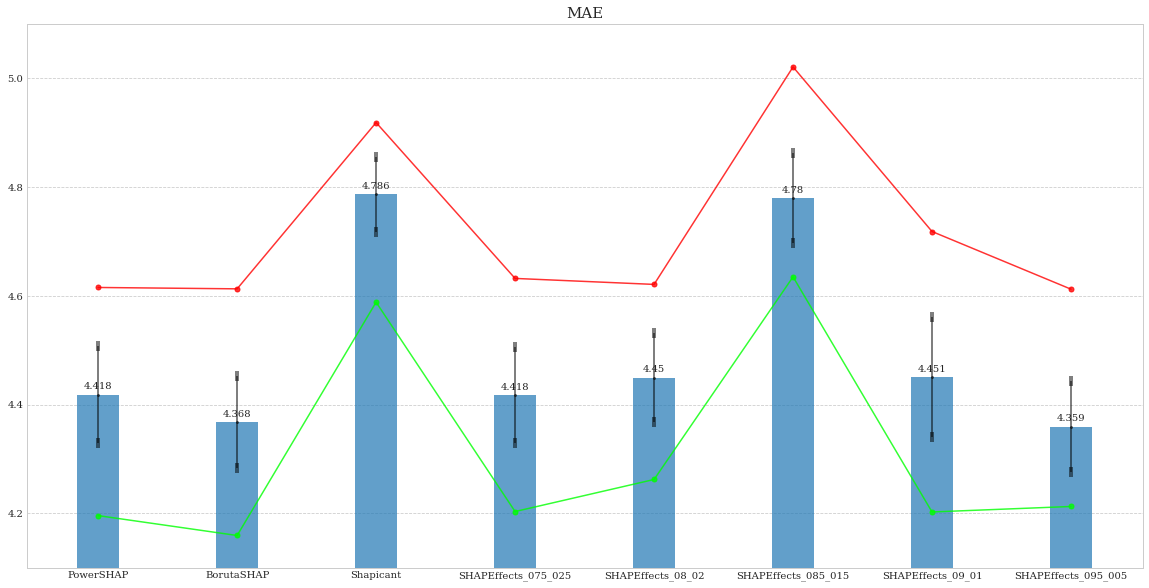

In [82]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.bar(nombres, resultados_mae_mean, alpha = 0.7, width=0.3)
ax.errorbar(nombres, resultados_mae_mean, resultados_mae_std, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
ax.plot(nombres, resultados_mae_max, color='red', alpha=0.8, linestyle='-', marker='.', markersize=10)
ax.plot(nombres, resultados_mae_min, color='lime', alpha=0.8, linestyle='-', marker='.', markersize=10)
ax.yaxis.grid(True,linestyle='--')
ax.xaxis.grid(False)
ax.title.set_text("MAE")
ax.title.set_size(15)
for index,data in enumerate(resultados_mae_mean):
    ax.text(x=index , y =data+0.01 , s=f"{round(data, 3)}" , fontdict=dict(fontsize=10), ha='center')
ax.set_ylim([4.1, 5.1])


## RMSE

In [74]:
resultados_rmse_mean = [mean_powershap_test['rmse'], mean_borutashap_test['rmse'], mean_shapicant_test['rmse'], mean_shapeffects_075_025_test['rmse'], mean_shapeffects_08_02_test['rmse'], mean_shapeffects_085_015_test['rmse'], mean_shapeffects_09_01_test['rmse'], mean_shapeffects_095_005_test['rmse']]
resultados_rmse_std = [std_powershap_test['rmse'], std_borutashap_test['rmse'], std_shapicant_test['rmse'], std_shapeffects_075_025_test['rmse'], std_shapeffects_08_02_test['rmse'], std_shapeffects_085_015_test['rmse'], std_shapeffects_09_01_test['rmse'], std_shapeffects_095_005_test['rmse']]
resultados_rmse_max = [max_powershap_test['rmse'], max_borutashap_test['rmse'], max_shapicant_test['rmse'], max_shapeffects_075_025_test['rmse'], max_shapeffects_08_02_test['rmse'], max_shapeffects_085_015_test['rmse'], max_shapeffects_09_01_test['rmse'], max_shapeffects_095_005_test['rmse']]
resultados_rmse_min = [min_powershap_test['rmse'], min_borutashap_test['rmse'], min_shapicant_test['rmse'], min_shapeffects_075_025_test['rmse'], min_shapeffects_08_02_test['rmse'], min_shapeffects_085_015_test['rmse'], min_shapeffects_09_01_test['rmse'], min_shapeffects_095_005_test['rmse']]

(6.5, 8.5)

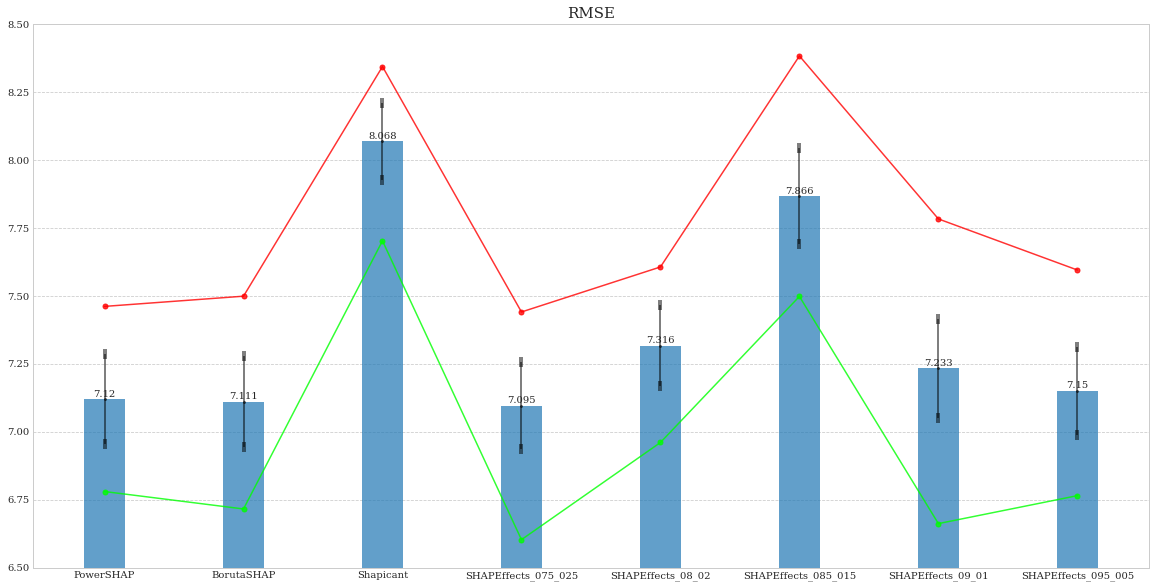

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.bar(nombres, resultados_rmse_mean, alpha = 0.7, width=0.3)
ax.errorbar(nombres, resultados_rmse_mean, resultados_rmse_std, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
ax.plot(nombres, resultados_rmse_max, color='red', alpha=0.8, linestyle='-', marker='.', markersize=10)
ax.plot(nombres, resultados_rmse_min, color='lime', alpha=0.8, linestyle='-', marker='.', markersize=10)
ax.yaxis.grid(True,linestyle='--')
ax.xaxis.grid(False)
ax.title.set_text("RMSE")
ax.title.set_size(15)
for index,data in enumerate(resultados_rmse_mean):
    ax.text(x=index , y =data+0.01 , s=f"{round(data, 3)}" , fontdict=dict(fontsize=10), ha='center')
ax.set_ylim([6.5, 8.5])

## R2

In [76]:
resultados_r2_mean = [mean_powershap_test['r2'], mean_borutashap_test['r2'], mean_shapicant_test['r2'], mean_shapeffects_075_025_test['r2'], mean_shapeffects_08_02_test['r2'], mean_shapeffects_085_015_test['r2'], mean_shapeffects_09_01_test['r2'], mean_shapeffects_095_005_test['r2']]
resultados_r2_std = [std_powershap_test['r2'], std_borutashap_test['r2'], std_shapicant_test['r2'], std_shapeffects_075_025_test['r2'], std_shapeffects_08_02_test['r2'], std_shapeffects_085_015_test['r2'], std_shapeffects_09_01_test['r2'], std_shapeffects_095_005_test['r2']]
resultados_r2_max = [max_powershap_test['r2'], max_borutashap_test['r2'], max_shapicant_test['r2'], max_shapeffects_075_025_test['r2'], max_shapeffects_08_02_test['r2'], max_shapeffects_085_015_test['r2'], max_shapeffects_09_01_test['r2'], max_shapeffects_095_005_test['r2']]
resultados_r2_min = [min_powershap_test['r2'], min_borutashap_test['r2'], min_shapicant_test['r2'], min_shapeffects_075_025_test['r2'], min_shapeffects_08_02_test['r2'], min_shapeffects_085_015_test['r2'], min_shapeffects_09_01_test['r2'], min_shapeffects_095_005_test['r2']]

In [77]:
resultados_r2_max, resultados_r2_min

([0.8979284765076968,
  0.8998507895873676,
  0.868267231587297,
  0.9031909098836702,
  0.8924236387165448,
  0.875169657806812,
  0.9014508292205841,
  0.8983846886762453],
 [0.8763897446885219,
  0.8751425248690591,
  0.8454221529857437,
  0.8770689485538935,
  0.8715351017380106,
  0.8439711766348696,
  0.8654972556794439,
  0.8719136388587962])

(0.82, 0.92)

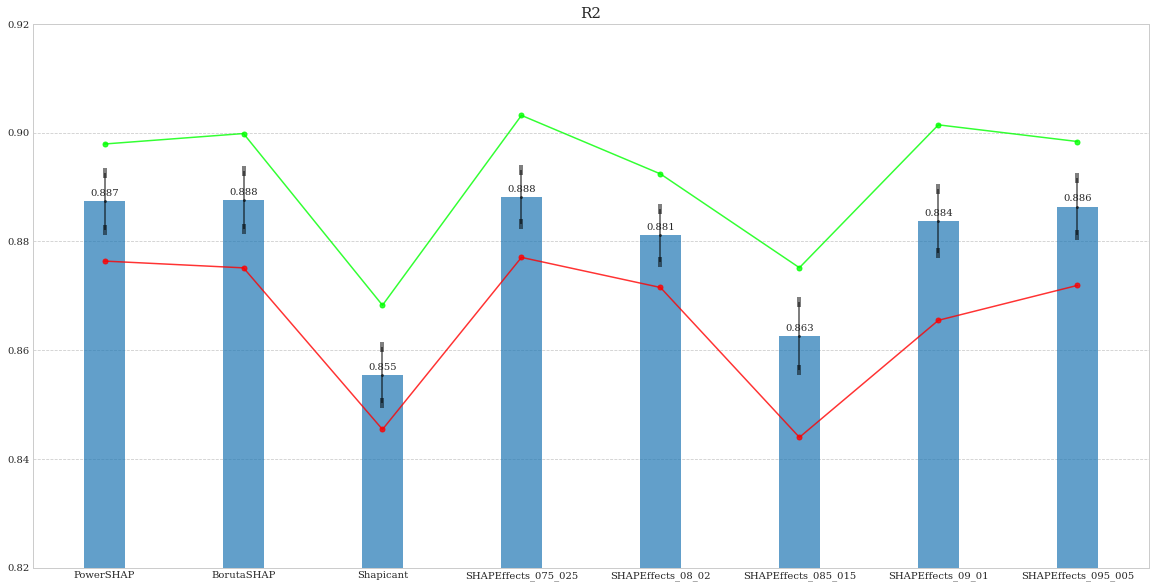

In [83]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.bar(nombres, resultados_r2_mean, alpha = 0.7, width=0.3)
ax.errorbar(nombres, resultados_r2_mean, resultados_r2_std, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
ax.plot(nombres, resultados_r2_max, color='lime', alpha=0.8, linestyle='-', marker='.', markersize=10)
ax.plot(nombres, resultados_r2_min, color='red', alpha=0.8, linestyle='-', marker='.', markersize=10)
ax.yaxis.grid(True,linestyle='--')
ax.xaxis.grid(False)
ax.title.set_text("R2")
ax.title.set_size(15)
for index,data in enumerate(resultados_r2_mean):
    ax.text(x=index , y =data+0.001 , s=f"{round(data, 3)}" , fontdict=dict(fontsize=10), ha='center')
ax.set_ylim([0.82, 0.92])

## Number of variables

In [79]:
n_var = [len(selected_features_powershap), len(selected_features_borutashap), len(selected_features_shapicant), len(selected_features_shapeffects_075_025), len(selected_features_shapeffects_08_02), len(selected_features_shapeffects_085_015), len(selected_features_shapeffects_09_01), len(selected_features_shapeffects_095_005)]

(50.0, 195.0)

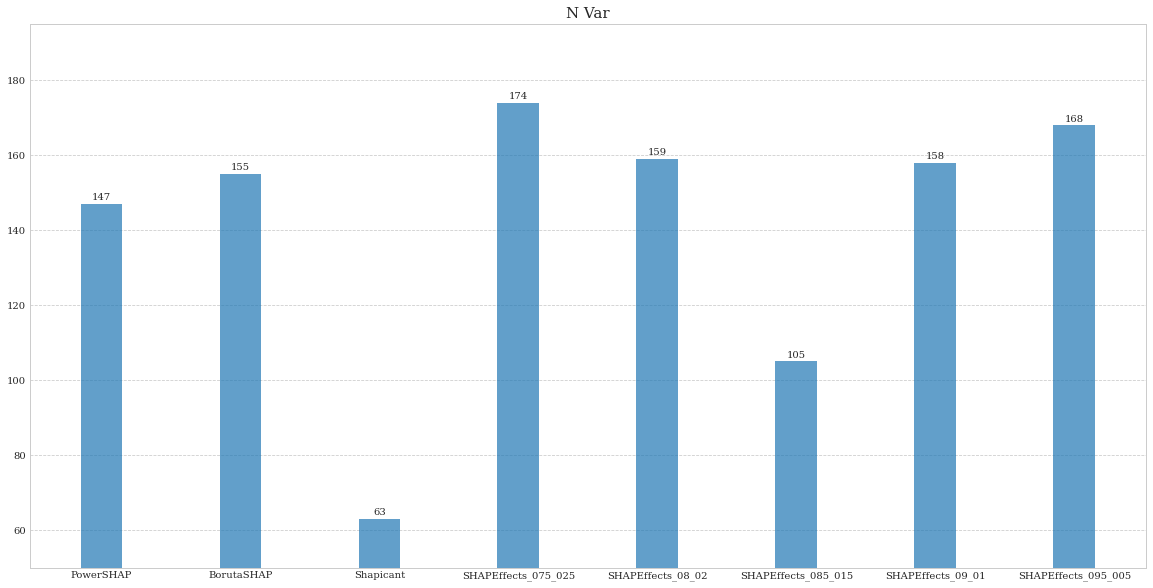

In [80]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
bars = ax.bar(nombres, n_var, alpha = 0.7, width=0.3)
ax.yaxis.grid(True,linestyle='--')
ax.xaxis.grid(False)
ax.title.set_text("N Var")
ax.title.set_size(15)
for index,data in enumerate(n_var):
    ax.text(x=index , y =data+1 , s=f"{round(data, 3)}" , fontdict=dict(fontsize=10), ha='center')
ax.set_ylim([50, 195])